# Clone the repo:

In [17]:
!git clone https://github.com/MiguelDiLalla/LEGO_Bricks_ML_Vision.git

Cloning into 'LEGO_Bricks_ML_Vision'...
Updating files:  38% (49/128)
Updating files:  39% (50/128)
Updating files:  40% (52/128)
Updating files:  41% (53/128)
Updating files:  42% (54/128)
Updating files:  43% (56/128)
Updating files:  44% (57/128)
Updating files:  45% (58/128)
Updating files:  46% (59/128)
Updating files:  47% (61/128)
Updating files:  48% (62/128)
Updating files:  49% (63/128)
Updating files:  50% (64/128)
Updating files:  51% (66/128)
Updating files:  52% (67/128)
Updating files:  53% (68/128)
Updating files:  54% (70/128)
Updating files:  55% (71/128)
Updating files:  56% (72/128)
Updating files:  57% (73/128)
Updating files:  58% (75/128)
Updating files:  59% (76/128)
Updating files:  60% (77/128)
Updating files:  61% (79/128)
Updating files:  62% (80/128)
Updating files:  63% (81/128)
Updating files:  64% (82/128)
Updating files:  65% (84/128)
Updating files:  66% (85/128)
Updating files:  67% (86/128)
Updating files:  68% (88/128)
Updating files:  69% (89/128)


## Install requeriments:

In [18]:
!pip install -r LEGO_Bricks_ML_Vision/requirements.txt

Defaulting to user installation because normal site-packages is not writeable


### Change repository directory:

In [19]:
import os
os.chdir("LEGO_Bricks_ML_Vision")

In [20]:
!python3 cli.py --help

No se encontr� Python; ejecuta sin argumentos para instalar desde Microsoft Store o deshabilita este acceso directo en Configuraci�n > Administrar alias de ejecuci�n de la aplicaci�n.


### GPU Availability:

In [21]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


CUDA Available: False
GPU Name: CPU


In [22]:
# !python3 cli.py train --mode bricks --epochs 1 --batch-size 16 --no-cleanup --no-show-results


# Show results media:

In [23]:
import os
import cv2
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
import yaml

def display_last_training_session(results_dir="/kaggle/working/LEGO_Bricks_ML_Vision/results"):
    """
    Displays all files from the specified training session directory.
    
    Args:
        session_dir (str): Path to the training session folder.
    """
    if not os.path.exists(results_dir):
        print(f"Results directory not found: {results_dir}")
        return

    print(f"Displaying training session: {results_dir}")
    files = sorted(os.listdir(results_dir))

    for file in files:
        file_path = os.path.join(results_dir, file)
        if file.lower().endswith((".jpg", ".png")):
            print(f"🖼️  Displaying image: {file}")
            image = cv2.imread(file_path)
            if image is None:
                print(f"Unable to load image: {file_path}")
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(10, 10))
            plt.imshow(image)
            plt.axis("off")
            display(plt.gcf())
            plt.close()

        elif file.lower().endswith(".txt"):
            print(f"📄 Displaying text file: {file}")
            with open(file_path, 'r') as f:
                print(f.read())

        elif file.lower().endswith(".csv"):
            print(f"📄 Displaying CSV file: {file}")
            try:
                df = pd.read_csv(file_path)
                display(df)
            except Exception as e:
                print(f"Error reading CSV file {file}: {e}")

        elif file.lower().endswith(".yaml"):
            print(f"📄 Displaying YAML file: {file}")
            try:
                with open(file_path, 'r') as f:
                    content = yaml.safe_load(f)
                pprint(content)
            except Exception as e:
                print(f"Error reading YAML file {file}: {e}")

        else:
            print(f"📄 Skipping unsupported file type: {file}")

    print("✅ Done displaying training session contents.")

# Get the last training session folder path
def get_last_training_session_dir(results_dir="/kaggle/working/LEGO_Bricks_ML_Vision/results"):
    """
    Gets the most recent training session directory based on the timestamp in the folder name.

    Args:
        results_dir (str): Path to the results directory.

    Returns:
        str: Path to the most recent training session directory.
    """
    if not os.path.exists(results_dir):
        print(f"Results directory not found: {results_dir}")
        return None

    session_dirs = [d for d in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, d))]
    if not session_dirs:
        print(f"No training session directories found in: {results_dir}")
        return None

    # Sort directories by timestamp in descending order
    session_dirs.sort(reverse=True)
    last_session_dir = os.path.join(results_dir, session_dirs[0])
    return last_session_dir

# Update the display_last_training_session function to use the last training session directory
last_training_session_dir = get_last_training_session_dir()

if last_training_session_dir:
    display_last_training_session(last_training_session_dir)


Results directory not found: /kaggle/working/LEGO_Bricks_ML_Vision/results


## Cleanup Training junk:

In [24]:
# use the clu cleanup command to remove all the training results
!python3 cli.py cleanup 

No se encontr� Python; ejecuta sin argumentos para instalar desde Microsoft Store o deshabilita este acceso directo en Configuraci�n > Administrar alias de ejecuci�n de la aplicaci�n.


# Testing utils: (inference, prediction, datasets labes traduction, etc)

## Predictions:

2025-02-15 14:26:05,113 - INFO - 🔹 Loading model: presentation/Models_DEMO/Stud_Model_best20250124_170824.pt ✅
2025-02-15 14:26:05,177 - INFO - Total images to process: 1 ✅


Using random training image for inference: presentation/Test_images/StudsPics\image_223_LegoBrick_2_c78.jpg

0: 640x640 1 stud, 134.0ms
Speed: 6.0ms preprocess, 134.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


2025-02-15 14:26:05,435 - INFO - ✅ Annotated image saved to: C:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision\notebooks\LEGO_Bricks_ML_Vision\results\annotated_image_223_LegoBrick_2_c78.jpg ✅


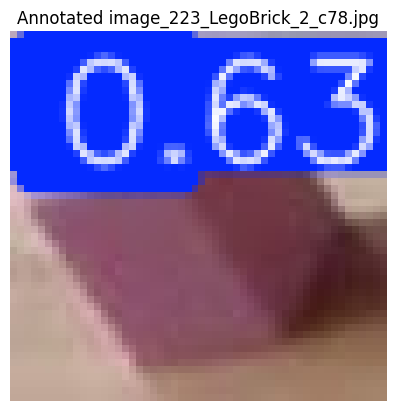

2025-02-15 14:26:05,729 - INFO - 🔹 Loading model: presentation/Models_DEMO/Brick_Model_best20250123_192838t.pt ✅
2025-02-15 14:26:05,789 - INFO - Total images to process: 1 ✅


Annotated image not found at: C:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision\notebooks\LEGO_Bricks_ML_Vision\results\annotated_20250215_142605_image_223_LegoBrick_2_c78.jpg
Detection metadata:
[{'detections': [[2.24511456489563,
                  1.139634132385254,
                  25.885873794555664,
                  21.534870147705078,
                  0.6275444030761719,
                  0.0]],
  'image_path': 'presentation/Test_images/StudsPics\\image_223_LegoBrick_2_c78.jpg'}]
Using random training image for inference: presentation/Test_images/BricksPics\image_701.jpg

0: 480x640 9 bricks, 88.0ms
Speed: 5.0ms preprocess, 88.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


2025-02-15 14:26:06,015 - INFO - ✅ Annotated image saved to: C:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision\notebooks\LEGO_Bricks_ML_Vision\results\annotated_image_701.jpg ✅


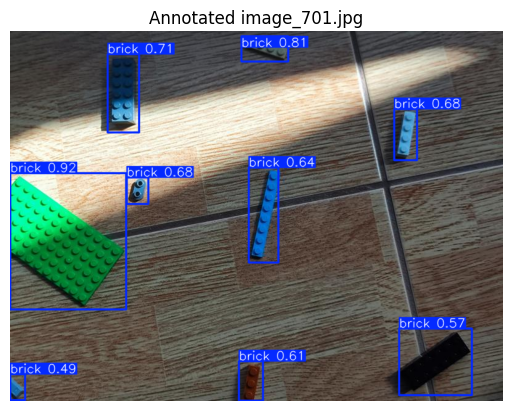

Annotated image not found at: C:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision\notebooks\LEGO_Bricks_ML_Vision\results\annotated_20250215_142606_image_701.jpg
Detection metadata:
[{'detections': [[0.8307456970214844,
                  230.78451538085938,
                  188.02200317382812,
                  451.59857177734375,
                  0.9227371215820312,
                  0.0],
                 [375.7133483886719,
                  8.584990501403809,
                  451.4720764160156,
                  49.82683563232422,
                  0.813381016254425,
                  0.0],
                 [158.5587921142578,
                  37.328453063964844,
                  209.9062957763672,
                  164.83961486816406,
                  0.7055366635322571,
                  0.0],
                 [623.9510498046875,
                  126.39118957519531,
                  660.3646850585938,
                  209.294921875,
                  0.6791354417800

In [37]:
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, Image
from utils.model_utils import load_model, predict
from datetime import datetime
from pprint import pprint
from train import get_repo_root  # import get_repo_root to properly resolve paths

def run_inference(mode="studs"):
    """
    Run inference on a random training image using the specified mode.

    Args:
        mode (str): The mode to use for inference. Default is "studs".
    """
    # Specify the training images directory based on the mode
    if mode == "bricks":
        training_images_dir = "presentation/Test_images/BricksPics"
    elif mode == "studs":
        training_images_dir = "presentation/Test_images/StudsPics"
    else:
        raise ValueError(f"Unsupported mode: {mode}")

    # Select a random training image from the folder
    training_images = [f for f in os.listdir(training_images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if training_images:
        training_image = os.path.join(training_images_dir, random.choice(training_images))
        print(f"Using random training image for inference: {training_image}")
    else:
        raise FileNotFoundError(f"No images found in directory: {training_images_dir}")

    # Load the model
    model = load_model(mode)

    # Retrieve the repository root, and build the absolute results folder path.
    repo_root = get_repo_root()
    results_folder = os.path.join(repo_root, "results")

    # Run inference on the single image; wrap it in a list for batch mode.
    results = predict(
        [training_image],
        model,
        mode=mode,
        batch_size=1,
        save_annotated=True,
        plt_annotated=True,
        results_folder=results_folder
    )

    # Construct the absolute path to the annotated image.
    # Generate a timestamp for the prediction
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    annotated_image_path = os.path.join(results_folder, f"annotated_{timestamp}_" + os.path.basename(training_image))
    if os.path.exists(annotated_image_path):
        print("Displaying annotated inference result with metadata and branding:")
        display(Image(filename=annotated_image_path))
    else:
        print(f"Annotated image not found at: {annotated_image_path}")

    # Print detection metadata
    print("Detection metadata:")
    pprint(results)

# Run inference for both modes
run_inference("studs")
run_inference("bricks")

## Clssify bricks:

In [40]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from pprint import pprint
from IPython.display import display, Image
from utils.model_utils import load_model, detect_and_classify  # ensure detect_and_classify is implemented
from train import get_repo_root

def run_classification(mode="bricks"):
    """
    Run full classification on a random training image using the available full algorithm.
    The mode can be "bricks" or "studs".
    """
    # Select training image directory based on mode
    if mode == "bricks":
        images_dir = "presentation/Test_images/BricksPics"
    elif mode == "studs":
        images_dir = "presentation/Test_images/StudsPics"
    else:
        raise ValueError(f"Unsupported mode: {mode}")

    # Gather image files and select one at random
    image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not image_files:
        print(f"No images found in {images_dir}")
        return
    selected_image = os.path.join(images_dir, random.choice(image_files))
    print(f"Selected image for classification: {selected_image}")

    # Load both models: one for brick detection and one for stud detection
    model_bricks = load_model("bricks")
    model_studs = load_model("studs")

    # Run detection and classification
    results = detect_and_classify(
        [selected_image],
        model_bricks,
        model_studs,
        confidence_threshold=0.5,
        overlap_threshold=0.5
    )
    
    # Print detection and classification results
    print("Classification results:")
    pprint(results)

    # Get absolute repository root and build annotated results path
    repo_root = get_repo_root()
    annotated_image_path = os.path.join(repo_root, "results", "annotated_" + os.path.basename(selected_image))
    if os.path.exists(annotated_image_path):
        print("Displaying annotated result:")
        display(Image(filename=annotated_image_path))
    else:
        print(f"Annotated image not found at: {annotated_image_path}")

# Run the classification test for bricks mode
run_classification("bricks")
run_classification("studs")

2025-02-15 14:31:38,005 - INFO - 🔹 Loading model: presentation/Models_DEMO/Brick_Model_best20250123_192838t.pt ✅
2025-02-15 14:31:38,092 - INFO - 🔹 Loading model: presentation/Models_DEMO/Stud_Model_best20250124_170824.pt ✅


Selected image for classification: presentation/Test_images/BricksPics\image_696.jpg

0: 480x640 8 bricks, 126.0ms
Speed: 8.0ms preprocess, 126.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 640x640 6 studs, 112.0ms
Speed: 6.0ms preprocess, 112.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 studs, 131.0ms
Speed: 7.0ms preprocess, 131.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x576 6 studs, 138.8ms
Speed: 7.5ms preprocess, 138.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 576)

0: 640x640 4 studs, 194.0ms
Speed: 7.6ms preprocess, 194.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 209.8ms
Speed: 7.0ms preprocess, 209.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 1 stud, 437.5ms
Speed: 10.0ms preprocess, 437.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 4 stu

2025-02-15 14:31:40,425 - INFO - 🔹 Loading model: presentation/Models_DEMO/Brick_Model_best20250123_192838t.pt ✅
2025-02-15 14:31:40,577 - INFO - 🔹 Loading model: presentation/Models_DEMO/Stud_Model_best20250124_170824.pt ✅


Classification results:
[{'detections': [{'bbox': [421, 88, 493, 159],
                  'confidence': 0.7449772953987122,
                  'dimension': '3x2'},
                 {'bbox': [391, 254, 444, 307],
                  'confidence': 0.7406978011131287,
                  'dimension': '2x2'},
                 {'bbox': [458, 530, 519, 600],
                  'confidence': 0.7398326992988586,
                  'dimension': '3x2'},
                 {'bbox': [502, 331, 556, 385],
                  'confidence': 0.7183440923690796,
                  'dimension': '2x2'},
                 {'bbox': [161, 570, 211, 600],
                  'confidence': 0.7074187397956848,
                  'dimension': 'UKN'},
                 {'bbox': [315, 568, 359, 599],
                  'confidence': 0.6488590836524963,
                  'dimension': '1x1'},
                 {'bbox': [203, 142, 272, 187],
                  'confidence': 0.647316575050354,
                  'dimension': '4x1'},
     

## Annotation tranformation:

2025-02-15 14:10:53,723 - INFO - Processing LabelMe annotations from: presentation/Test_Labels/LabelMe_jsons ✅
2025-02-15 14:10:53,725 - INFO - Saving YOLO annotations to: cache/datasets/processed/YOLO_labels\LabelMe_jsons ✅
2025-02-15 14:10:53,735 - INFO - Converted image_103.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_103.txt ✅
2025-02-15 14:10:53,743 - INFO - Converted image_1197.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_1197.txt ✅
2025-02-15 14:10:53,752 - INFO - Converted image_1205.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_1205.txt ✅
2025-02-15 14:10:53,759 - INFO - Converted image_1208.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_1208.txt ✅
2025-02-15 14:10:53,768 - INFO - Converted image_136.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_136.txt ✅
2025-02-15 14:10:53,777 - INFO - Converted image_1543.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_1543.txt ✅

Using random LabelMe JSON for conversion: presentation/Test_Labels/LabelMe_jsons\image_136.json


2025-02-15 14:10:53,785 - INFO - Converted image_1552.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_1552.txt ✅
2025-02-15 14:10:53,794 - INFO - Converted image_1556.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_1556.txt ✅
2025-02-15 14:10:53,801 - INFO - Converted image_1729.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_1729.txt ✅
2025-02-15 14:10:53,807 - INFO - Converted image_1734.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_1734.txt ✅
2025-02-15 14:10:53,817 - INFO - Converted image_196.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_196.txt ✅
2025-02-15 14:10:53,825 - INFO - Converted image_286.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_286.txt ✅
2025-02-15 14:10:53,833 - INFO - Converted image_504.json -> cache/datasets/processed/YOLO_labels\LabelMe_jsons\image_504.txt ✅
2025-02-15 14:10:53,841 - INFO - Converted image_512.json -> cache/datasets/processed/YOLO_label


Original JSON annotation:
{
  "version": "5.2.1",
  "flags": {},
  "shapes": [
    {
      "label": "LegoBrick",
      "points": [
        [
          433.7606837606838,
          285.4700854700855
        ],
        [
          320.0854700854701,
          454.70085470085473
        ]
      ],
      "group_id": null,
      "description": "",
      "shape_type": "rectangle",
      "flags": {}
    }
  ],
  "imagePath": "image_136.jpg",
  "imageData": "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJYAyADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEB

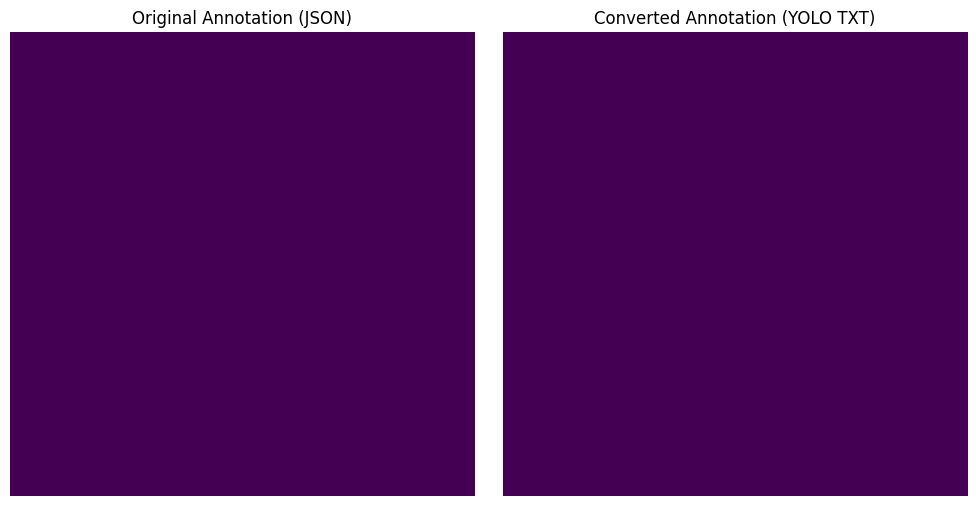

In [26]:
import os, json, random
import matplotlib.pyplot as plt
from IPython.display import display

# Import your conversion function (assumes it is implemented in data_utils.py)
from utils.data_utils import convert_labelme_to_yolo

# Select a random LabelMe JSON file from the presentation/Test_Labels/LabelMe_jsons folder
labelme_dir = "presentation/Test_Labels/LabelMe_jsons"
json_files = [f for f in os.listdir(labelme_dir) if f.endswith(".json")]
if json_files:
    example_file = os.path.join(labelme_dir, random.choice(json_files))
    print(f"Using random LabelMe JSON for conversion: {example_file}")
    
    # Read the original content
    with open(example_file, "r") as f:
        original_content = json.load(f)
    
    # Imitate argparse args for conversion (the conversion function should use the input path and
    # output folder to store the converted file; here we simply run it and then read the output)
    class Args:
        pass
    
    args = Args()
    args.input = labelme_dir
    # Force output to a temporary folder for testing
    output_dir = "results/LabelMe_to_YOLO"
    os.makedirs(output_dir, exist_ok=True)
    args.output = output_dir

    # Run conversion function (if it returns converted content or writes files)
    convert_labelme_to_yolo(args)
    
    # Assume the output file name is similar to the input but with .txt extension
    converted_filename = os.path.basename(example_file).replace(".json", ".txt")
    converted_file = os.path.join(output_dir, converted_filename)
    
    if os.path.exists(converted_file):
        with open(converted_file, "r") as f:
            converted_content = f.read()
    else:
        converted_content = "Conversion did not produce an output file."

    # Pretty print both original and converted results
    print("\nOriginal JSON annotation:")
    print(json.dumps(original_content, indent=2))
    print("\nConverted YOLO annotation text:")
    print(converted_content)
    
    # For visual comparison, create two black images with annotations drawn over.
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Left: raw annotation (simulate by a black image with text)
    axes[0].imshow([[0]])
    axes[0].set_title("Original Annotation (JSON)")
    axes[0].axis("off")
    # Right: converted annotation
    axes[1].imshow([[0]])
    axes[1].set_title("Converted Annotation (YOLO TXT)")
    axes[1].axis("off")
    plt.tight_layout()
    plt.show()
else:
    print("No LabelMe JSON files found in the directory.")

### keipoints to bounding boxes

In [27]:
import os, json, random
import matplotlib.pyplot as plt
from IPython.display import display
import math

# Import your keypoint conversion function from data_utils (assumes it is implemented)
from utils.data_utils import convert_keypoints_to_bboxes

# Pick a random LabelMe keypoints JSON file from the appropriate folder
keypoints_dir = r"C:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision\presentation\Test_Labels\Yolo_keipoints\LabelMe_Keipoints_jsons"  # Adjust if keypoint files are in a different folder
json_files = [f for f in os.listdir(keypoints_dir) if f.endswith(".json")]
if json_files:
    example_file = os.path.join(keypoints_dir, random.choice(json_files))
    print(f"Using random LabelMe keypoints JSON for conversion: {example_file}")
    
    # Read original annotations
    with open(example_file, "r") as f:
        original_data = json.load(f)
    
    # Imitate argparse args
    class Args:
        pass
    
    args = Args()
    args.input = keypoints_dir
    # Force output to a temporary folder for testing
    output_dir = "results/Keypoints_to_BBoxes"
    os.makedirs(output_dir, exist_ok=True)
    args.output = output_dir
    args.area_ratio = 0.4  # or any test ratio

    # Run conversion function (it should process keypoints and write bounding boxes)
    convert_keypoints_to_bboxes(args)

    # Assume the output file has the same filename
    converted_file = os.path.join(output_dir, os.path.basename(example_file))
    if os.path.exists(converted_file):
        with open(converted_file, "r") as f:
            converted_data = json.load(f)
    else:
        converted_data = "Conversion did not produce an output file."
    
    # Pretty print both results
    print("\nOriginal Keypoints JSON:")
    print(json.dumps(original_data, indent=2))
    print("\nConverted Bounding Boxes JSON:")
    print(json.dumps(converted_data, indent=2) if isinstance(converted_data, dict) else converted_data)
    
    # Visual comparison with two placeholder black boxes
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow([[0]], cmap="gray")
    axes[0].set_title("Original Keypoints")
    axes[0].axis("off")
    
    axes[1].imshow([[0]], cmap="gray")
    axes[1].set_title("Converted Bounding Boxes")
    axes[1].axis("off")
    plt.tight_layout()
    plt.show()
else:
    print("No LabelMe keypoints JSON files found in the directory.")

2025-02-15 14:10:54,280 - INFO - Processing keypoints from: C:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision\presentation\Test_Labels\Yolo_keipoints\LabelMe_Keipoints_jsons ✅
2025-02-15 14:10:54,282 - INFO - Saving bounding boxes to: cache/datasets/processed/bboxes\LabelMe_Keipoints_jsons ✅


Using random LabelMe keypoints JSON for conversion: C:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision\presentation\Test_Labels\Yolo_keipoints\LabelMe_Keipoints_jsons\image_87_LegoBrick_4_c72.json


NameError: name 'math' is not defined

#### Repo clone tree monitoring:

In [ ]:
import os

def print_folder_tree(startpath=".", indent="    ", max_files=30, preview_files=5):
    """
    Prints the directory tree of the given path in a structured format.

    Args:
        startpath (str): The root directory to print the structure from. Default is current directory.
        indent (str): The indentation format for tree depth.
        max_files (int): Max number of files before compressing the list.
        preview_files (int): Number of files to show from start and end when compressing.
    """
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, "").count(os.sep)
        indent_space = indent * level
        print(f"{indent_space}📂 {os.path.basename(root)}/")  # Print folder name

        sub_indent_space = indent * (level + 1)
        
        # If folder has too many files, compress the list
        if len(files) > max_files:
            files_to_show = files[:preview_files] + ["[...]"] + files[-preview_files:]
        else:
            files_to_show = files  # Show all files if within limit

        for file in files_to_show:
            print(f"{sub_indent_space}📄 {file}")  # Print files inside the folder

# Run the function for your main directory
# print_folder_tree("/kaggle/working/")
